In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

M = 1
L = 1
G = 10
W = math.sqrt(G/L)
x0 = -math.pi / 2
v0 = 0

t = np.linspace(0, 10, 10000)

## Метод Эйлера-Кромера

In [2]:
v = lambda v_last, x_last, t: v_last - (W**2)*math.sin(x_last)*t
x = lambda v_last, x_last, t: x_last + v_last*t


def get_vs_xs(t):
    vs = [v(0, x0, t[0])]
    xs = [x0]
    len_t = len(t)
    for i in range(1, len_t):
        delta_t = t[i] - t[i - 1]
        v_i = v(vs[i-1], xs[i-1], delta_t)
        x_i = x(v_i, xs[i-1], delta_t)

        vs.append(v_i)
        xs.append(x_i)
    
    return vs, xs    

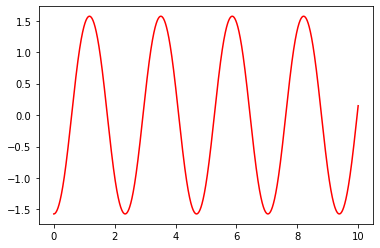

In [3]:
vs, xs = get_vs_xs(t)

plt.plot(t, xs, "-r")

In [4]:
v_eilera_kromera, x_eilera_kromera = get_vs_xs(t)

## Метод Эйлера
#### Не показывать, он плохой :(

In [5]:
v = lambda v_last, x_last, t: v_last - (W**2)*math.sin(x_last)*t
x = lambda v_last, x_last, t: x_last + v_last*t

def get_vs_xs(t):
    vs = [v(0, x0, t[0])]
    xs = [x0]
    len_t = len(t)
    for i in range(1, len_t):
        delta_t = t[i] - t[i - 1]
        v_i = v(vs[i-1], xs[i-1], delta_t)
        x_i = x(vs[i-1], xs[i-1], delta_t)

        vs.append(v_i)
        xs.append(x_i)
    
    return vs, xs    

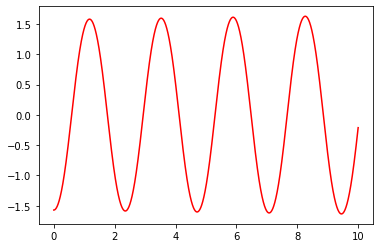

In [6]:
vs, xs = get_vs_xs(t)

plt.plot(t, xs, "-r")

In [7]:
v_eilera, x_eilera = get_vs_xs(t)

## Метод предиктор-корректор

In [8]:
v_avg = lambda v_last, x_last, t: v_last - (W**2)*math.sin(x_last)*t
x_avg = lambda v_last, x_last, t: x_last + v_last*t
v = lambda v_last, x_last, x_avg, t: v_last + (t/2)*(-(W**2)*math.sin(x_last) + -(W**2)*math.sin(x_avg))
x = lambda v_last, x_last, v_avg, t: x_last + (t/2)*(v_last + v_avg)

def get_vs_xs(t):
    vs = [v(0, x0, 0, t[0])]
    xs = [x0]
    len_t = len(t)
    for i in range(1, len_t):
        delta_t = t[i] - t[i - 1]
        v_avg_i = v_avg(vs[i-1], xs[i-1], delta_t)
        x_avg_i = x_avg(v_avg_i, xs[i-1], delta_t)
        v_i = v(vs[i-1], xs[i-1], x_avg_i, delta_t)
        x_i = x(vs[i-1], xs[i-1], v_avg_i, delta_t)

        vs.append(v_i)
        xs.append(x_i)
    
    return vs, xs    

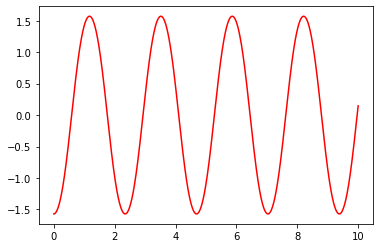

In [9]:
vs, xs = get_vs_xs(t)

plt.plot(t, xs, "-r")

In [10]:
v_prediktor_korrector, x_prediktor_korrector = get_vs_xs(t)

In [11]:
e = lambda m, l, w, v, x: m*(l**2)*(0.5*v**2 + w**2*(1-math.cos(x)))

In [12]:
len_t = len(t)
e_eilera = [e(M, L, W, v_eilera[i], x_eilera[i]) for i in range(len_t)]
e_eilera_kromera = [e(M, L, W, v_eilera_kromera[i], x_eilera_kromera[i]) for i in range(len_t)]
e_prediktor_korrector = [e(M, L, W, v_prediktor_korrector[i], x_prediktor_korrector[i]) for i in range(len_t)]

### График e_eilera(t), e_eilera_kromera(t), e_prediktor_korrector(t)

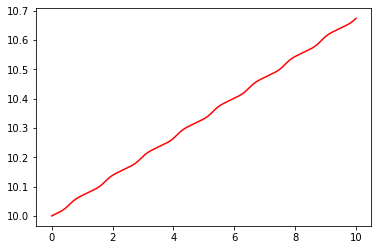

In [13]:
plt.plot(t, e_eilera, "-r")

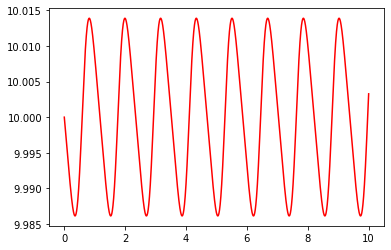

In [14]:
plt.plot(t, e_eilera_kromera, "-r")

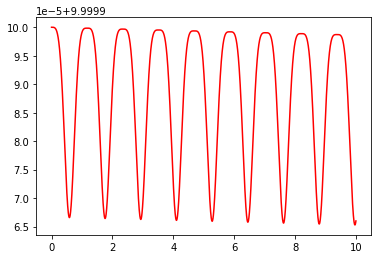

In [15]:
plt.plot(t, e_prediktor_korrector, "-r")

## Ошибка для 2х лучших методов (Эйлера-Кромера, Предиктор-Корректор)

In [16]:
e_0 = M*(L**2)*(W**2)*(1-math.cos(math.pi/2))

# Эйлер-Кромер
error_e_eilera_kromera = [e - e_0 for e in e_eilera_kromera]
error_e_prediktor_korrector = [e - e_0 for e in e_prediktor_korrector]
steps = [i for i in range(len_t)]

0.013887929738739757


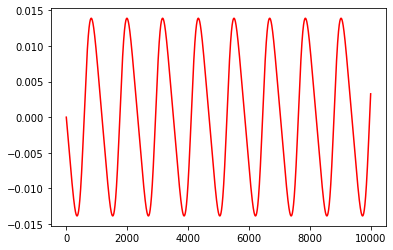

In [17]:
print(max(error_e_eilera_kromera))
plt.plot(steps, error_e_eilera_kromera, "-r")

3.4706751570467986e-05


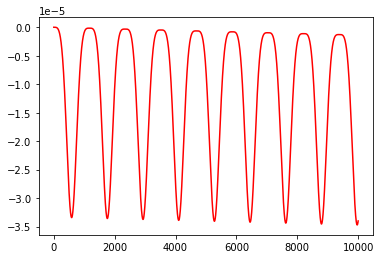

In [18]:
print(abs(min(error_e_prediktor_korrector)))
plt.plot(steps, error_e_prediktor_korrector, "-r")

## Зависимость ошибки от шага

In [19]:
# Return errors for eilera kromera method
def get_error_e_eilera_kromera(t):
    v = lambda v_last, x_last, t: v_last - (W**2)*math.sin(x_last)*t
    x = lambda v_last, x_last, t: x_last + v_last*t


    def get_vs_xs(t):
        vs = [v(0, x0, t[0])]
        xs = [x0]
        len_t = len(t)
        for i in range(1, len_t):
            delta_t = t[i] - t[i - 1]
            v_i = v(vs[i-1], xs[i-1], delta_t)
            x_i = x(v_i, xs[i-1], delta_t)

            vs.append(v_i)
            xs.append(x_i)

        return vs, xs    
    
    v_eilera_kromera, x_eilera_kromera = get_vs_xs(t)
    len_t = len(t)
    return [abs(e(M, L, W, v_eilera_kromera[i], x_eilera_kromera[i]) - e_0) for i in range(len_t)]

# Return errors for prediktor_korrector methods
def get_error_e_prediktor_korrector(t):
    v_avg = lambda v_last, x_last, t: v_last - (W**2)*math.sin(x_last)*t
    x_avg = lambda v_last, x_last, t: x_last + v_last*t
    v = lambda v_last, x_last, x_avg, t: v_last + (t/2)*(-(W**2)*math.sin(x_last) + -(W**2)*math.sin(x_avg))
    x = lambda v_last, x_last, v_avg, t: x_last + (t/2)*(v_last + v_avg)

    def get_vs_xs(t):
        vs = [v(0, x0, 0, t[0])]
        xs = [x0]
        len_t = len(t)
        for i in range(1, len_t):
            delta_t = t[i] - t[i - 1]
            v_avg_i = v_avg(vs[i-1], xs[i-1], delta_t)
            x_avg_i = x_avg(v_avg_i, xs[i-1], delta_t)
            v_i = v(vs[i-1], xs[i-1], x_avg_i, delta_t)
            x_i = x(vs[i-1], xs[i-1], v_avg_i, delta_t)

            vs.append(v_i)
            xs.append(x_i)

        return vs, xs     
    
    v_prediktor_korrector, x_prediktor_korrector = get_vs_xs(t)
    len_t = len(t)
    return [abs(e(M, L, W, v_prediktor_korrector[i], x_prediktor_korrector[i]) - e_0) for i in range(len_t)]



In [20]:
# изменения шага 
delta_t = np.linspace(100, 1000, 50)

In [21]:
t_steps = [np.linspace(0, 10, int(tau)) for tau in delta_t]  # список из списков времени с разным шагом

# список с максимальными ошибками для предиктор-корректор
e_prediktor_korrector_errors = [max(get_error_e_prediktor_korrector(t)) for t in t_steps] 

# список с максимальными ошибками для эйлер-кромера
e_eilera_kromera_errors = [max(get_error_e_eilera_kromera(t)) for t in t_steps]

 ## При большом шаге пересечение ошибок у Эйлера-Кромера и Предиктора-Корректора

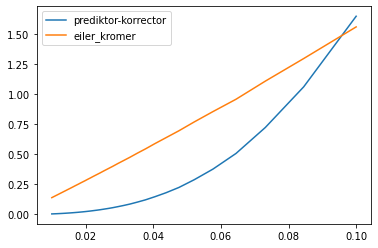

In [22]:
plt.plot([10/_ for _ in delta_t], e_prediktor_korrector_errors, label="prediktor-korrector")
plt.plot([10/_ for _ in delta_t] , e_eilera_kromera_errors, label="eiler_kromer")
plt.legend()